In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import gdown
file_id = "13aTYBujdTbIjnvMIpkTsrLT5C5mN40l6"
output = "dataset.npy"
gdown.download(id=file_id, output=output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=13aTYBujdTbIjnvMIpkTsrLT5C5mN40l6
From (redirected): https://drive.google.com/uc?id=13aTYBujdTbIjnvMIpkTsrLT5C5mN40l6&confirm=t&uuid=455042db-f2b4-41aa-b8ca-b2de74dff4e7
To: /content/dataset.npy
100%|██████████| 167M/167M [00:04<00:00, 40.8MB/s]


'dataset.npy'

In [ ]:
# custom loss function, taking into account the RGB values
# 효과는 크게 없었지만, 논리적으로는 맞는 부분인 것 같음.
from keras.saving import register_keras_serializable
from tensorflow.keras import backend as K

@register_keras_serializable()
# Custom loss function that applies MSE specifically to RGB channels
def mse_rgb(y_true, y_pred):
    # y_true and y_pred are assumed to be in shape (batch_size, height, width, 3)
    return K.mean(K.square(y_true - y_pred), axis=-1)

In [ ]:
# download from huggingface

from huggingface_hub import hf_hub_download

repo_id = "mk48/nipa-cunet"
# Hugging Face repo_id와 파일 이름
filename = "unetv2_rgbmse.keras"

# Hugging Face에서 .keras 파일 다운로드 및 모델 로드
model_path = hf_hub_download(repo_id=repo_id, filename=filename)
model = tf.keras.models.load_model(model_path)

# 모델 사용 예시
model.summary()  # 모델 요약 출력

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


unetv2_rgbmse.keras:   0%|          | 0.00/373M [00:00<?, ?B/s]

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 128, 128, 4)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          2,368 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 512)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ label_input (InputLayer)  │ (None, 10)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │          2,816 │ label_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose     

 Total params: 93,299,150 (355.91 MB)

 Trainable params: 31,099,716 (118.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,199,434 (237.27 MB)

In [ ]:
# def unet_model(input_shape=(128, 128, 4), num_classes=10):

#     image_input = layers.Input(shape=input_shape, name="image_input")
#     label_input = layers.Input(shape=(num_classes,), name="label_input")

#     # 라벨 데이터를 이미지 크기로 확장
#     shape_size = 64
#     label_embedding2 = layers.Dense(shape_size * shape_size)(label_input)
#     label_embedding2 = layers.Reshape((shape_size, shape_size, 1))(label_embedding2)

#     shape_size = 32
#     label_embedding3 = layers.Dense(shape_size * shape_size)(label_input)
#     label_embedding3 = layers.Reshape((shape_size, shape_size, 1))(label_embedding3)

#     shape_size = 16
#     label_embedding4 = layers.Dense(shape_size * shape_size)(label_input)
#     label_embedding4 = layers.Reshape((shape_size, shape_size, 1))(label_embedding4)


#     # 인코더 (Contracting Path)
#     c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
#     c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
#     p1 = layers.MaxPooling2D((2, 2))(c1)

#     c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
#     c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
#     p2 = layers.MaxPooling2D((2, 2))(c2)

#     c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
#     c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
#     p3 = layers.MaxPooling2D((2, 2))(c3)

#     c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
#     c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
#     p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

#     # 중간 레이어 (Bottleneck)
#     c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
#     c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

#     # 디코더 (Expanding Path)
#     u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
#     u6 = layers.concatenate([u6, c4, label_embedding4])
#     c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
#     c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

#     u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
#     u7 = layers.concatenate([u7, c3, label_embedding3])
#     c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
#     c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

#     u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
#     u8 = layers.concatenate([u8, c2, label_embedding2])
#     c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
#     c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

#     u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
#     u9 = layers.concatenate([u9, c1])
#     c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
#     c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

#     # 출력 레이어 (Sigmoid를 사용하여 0~1 사이의 확률값으로 출력)
#     outputs = layers.Conv2D(4, (1, 1), activation='relu')(c9)

#     model = Model(inputs=[image_input, label_input], outputs=[outputs])
#     return model

# # 모델 생성 및 컴파일
# model = unet_model(input_shape=(128, 128, 4), num_classes=10)
# model.compile(optimizer='adam', loss=mse_rgb, metrics=['accuracy'])
# model.summary()


In [ ]:
def label_to_one_hot(labels, num_classes, repeat):
  now_label_dataset = np.zeros((num_classes))
  now_label_dataset[labels]  = 1
  now_label_dataset = np.expand_dims(now_label_dataset, axis=0)
  now_label_dataset = np.repeat(now_label_dataset, repeats=repeat, axis=0)
  return now_label_dataset

In [ ]:
dataset = np.load('dataset.npy')
# Split into train and validation sets using indexing to optimize memory.

x_dataset = dataset[:,0,:,:,:]
y_dataset = dataset[:,1,:,:,:]
rr  = x_dataset.shape[0]
label_dataset = label_to_one_hot(1,10, rr)

for i in range(8) :
  x_dataset = np.concatenate((x_dataset, dataset[:,0,:,:,:] ), axis = 0)
  y_dataset = np.concatenate((y_dataset, dataset[:,i+2,:,:,:] ), axis = 0)
  label_dataset = np.concatenate((label_dataset, label_to_one_hot(i + 2,10, rr)), axis = 0)

print('data set shape----------------')
print(x_dataset.shape)
print(y_dataset.shape)
print(label_dataset.shape)

indexes = np.arange(x_dataset.shape[0])
# np.random.shuffle(indexes)


x_train = x_dataset[indexes[: int(0.9 * x_dataset.shape[0])]]
y_train = y_dataset[indexes[: int(0.9 * x_dataset.shape[0])]]
label_train = label_dataset[indexes[: int(0.9 * x_dataset.shape[0])]]

x_test = x_dataset[indexes[int(0.9 * x_dataset.shape[0]) :]]
y_test = y_dataset[indexes[int(0.9 * x_dataset.shape[0]) :]]
label_test = label_dataset[indexes[int(0.9 * x_dataset.shape[0]) :]]

print('train_data set shape----------------')
print(x_train.shape)
print(y_train.shape)
print(label_train.shape)
print('test_data set shape----------------')
print(x_test.shape)
print(y_test.shape)
print(label_test.shape)

data set shape----------------
(2295, 128, 128, 4)
(2295, 128, 128, 4)
(2295, 10)
train_data set shape----------------
(2065, 128, 128, 4)
(2065, 128, 128, 4)
(2065, 10)
test_data set shape----------------
(230, 128, 128, 4)
(230, 128, 128, 4)
(230, 10)


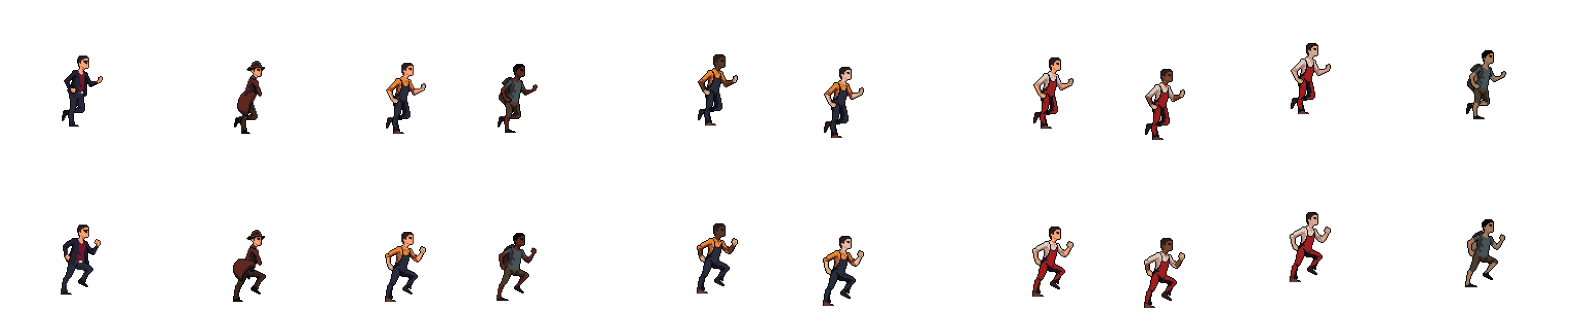

In [ ]:
# 원본 이미지 및 재구성 이미지 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(128, 128, 4), cmap="gray")
    plt.axis("off")

    # 재구성 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_train[i].reshape(128, 128,4 ), cmap="gray")
    plt.axis("off")
plt.show()

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# # 모델 학습from tensorflow.keras.callbacks import EarlyStopping
# # 얼리 스토핑 콜백 설정
# early_stopping = EarlyStopping(
#     monitor='val_loss',     # 검토할 메트릭 ('val_loss'도 사용 가능)
#     patience=10,         # 성능 개선 없이 기다릴 에포크 수
#     restore_best_weights=True  # 최상의 가중치를 복원할지 여부
# )

# # 예시 데이터셋: x_train은 입력 이미지, y_train은 분할 마스크
# model.fit((x_train, label_train), y_train, epochs=2000, batch_size=32, shuffle=True,  validation_data=((x_test, label_test), y_test), callbacks=[early_stopping])

In [ ]:
x_test_head = x_test[:5, :, :, :]
new_x_test = x_test_head[:1].repeat(10, axis=0)
for i in range(4) :
  new_x_test = np.concatenate((new_x_test, x_test_head[i + 1 : i + 2].repeat(10, axis=0)), axis=0)

In [ ]:
test_label = np.zeros((50, 10))
for i in range(50) :
  test_label[i, i % 10] = 1

In [ ]:
decoded_imgs = model.predict((new_x_test, test_label))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [ ]:
decoded_imgs = decoded_imgs / 255

In [ ]:
decoded_imgs.shape

(50, 128, 128, 4)

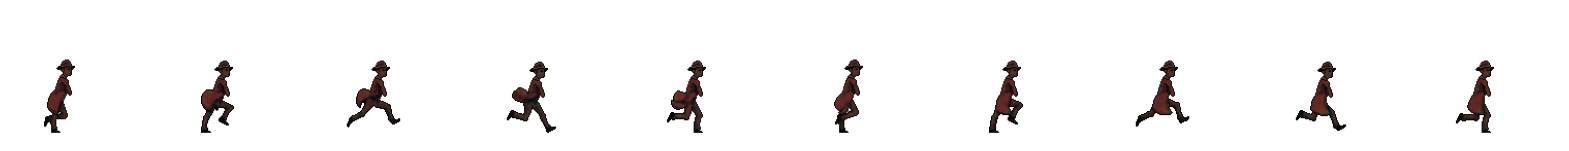

In [ ]:
# 원본 이미지 및 재구성 이미지 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    if i == 0 :
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(128, 128, 4), cmap="gray")
      plt.axis("off")
    else:
      # 재구성 이미지
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(decoded_imgs[i].reshape(128, 128, 4), cmap="gray")
      plt.axis("off")
plt.show()

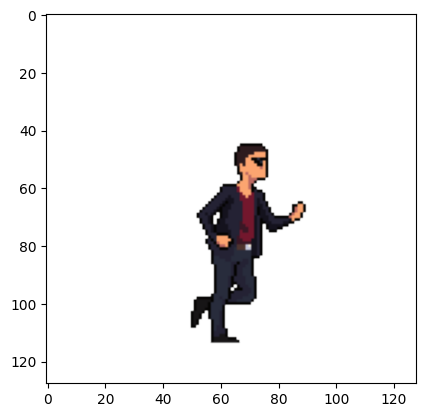

In [ ]:
plt.imshow(x_train[0])

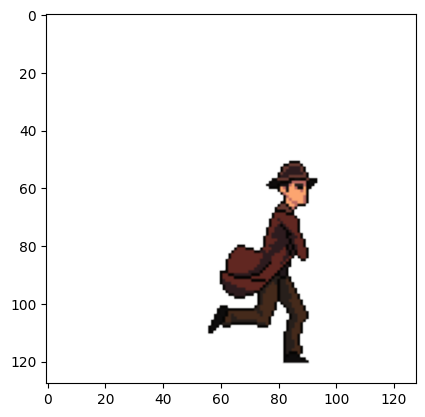

In [ ]:
plt.imshow(y_train[255*3+1])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
def animate_frames(predicted_frames):
    """
    Create and display an animation from predicted frames in Jupyter Notebook.

    Parameters:
    predicted_frames (numpy array): Array of predicted frames, expected shape (num_frames, 128, 128, 3).
    """
    num_frames = predicted_frames.shape[0]

    # Create a figure
    fig, ax = plt.subplots()

    # Display the first frame initially
    img = ax.imshow(predicted_frames[0], animated=True)
    ax.axis('off')  # Hide the axis for visual appeal

    # Update function for the animation
    def update(frame_num):
        img.set_array(predicted_frames[frame_num])  # Update the image data with the new frame
        return [img]

    # Create the animation: FuncAnimation creates a new image every interval
    ani = FuncAnimation(
        fig, update, frames=num_frames, interval=200, blit=True  # interval sets the frame display time (in ms)
    )

    # Display the animation in Jupyter
    plt.close(fig)  # Close the figure to prevent a static image from being displayed
    return HTML(ani.to_jshtml())  # Display the animation in HTML format


In [ ]:
decoded_imgs.shape

(50, 128, 128, 4)

In [ ]:
def concat_images(idx, num_frames):
  org = np.expand_dims(x_test[idx], axis=0) / 255
  combined_images = np.concatenate((org, decoded_imgs[idx*10:idx*10+10]), axis=0)

  return combined_images

In [ ]:
concat_images(0, 10).shape

(10, 128, 128, 4)

In [ ]:
animate_frames(concat_images(0, 10))

In [ ]:
# saving gif file

def animate_frames(predicted_frames, save_path=None, fps=5):
    """
    Create, display, and optionally save an animation from predicted frames in Jupyter Notebook.

    Parameters:
    predicted_frames (numpy array): Array of predicted frames, expected shape (num_frames, 128, 128, 3).
    save_path (str, optional): Path to save the animation (supports formats like .mp4 or .gif).
    fps (int, optional): Frames per second for the animation. Default is 5 fps.
    """
    num_frames = predicted_frames.shape[0]

    # Create a figure
    fig, ax = plt.subplots()

    # Display the first frame initially
    img = ax.imshow(predicted_frames[0], animated=True)
    ax.axis('off')  # Hide the axis for visual appeal

    # Update function for the animation
    def update(frame_num):
        img.set_array(predicted_frames[frame_num])  # Update the image data with the new frame
        return [img]

    # Create the animation: FuncAnimation creates a new image every interval
    ani = FuncAnimation(
        fig, update, frames=num_frames, interval=1000//fps, blit=True  # interval in ms
    )

    if save_path:
        # Save the animation
        if save_path.endswith(".mp4"):
            ani.save(save_path, writer="ffmpeg", fps=fps)
        elif save_path.endswith(".gif"):
            ani.save(save_path, writer="pillow", fps=fps)
        print(f"Animation saved to {save_path}")

    # Display the animation in Jupyter
    plt.close(fig)  # Close the figure to prevent a static image from being displayed
    return HTML(ani.to_jshtml())

In [ ]:
animate_frames(concat_images(4, 10), 'unetv2.gif', fps=5)

Animation saved to unetv2.gif
